[0.021, 0.262, 0.448, 0.521, 0.587, 0.638, 0.659, 0.708, 0.74, 0.753]
[0.018, 0.193, 0.338, 0.425, 0.508, 0.579, 0.612, 0.648, 0.662, 0.697]
[0.012, 0.176, 0.258, 0.357, 0.408, 0.484, 0.509, 0.53, 0.594, 0.588]
[0.013, 0.132, 0.223, 0.293, 0.378, 0.412, 0.432, 0.471, 0.499, 0.561]
[0.006, 0.104, 0.187, 0.284, 0.339, 0.361, 0.424, 0.44, 0.463, 0.536]
[0.004, 0.079, 0.164, 0.224, 0.296, 0.327, 0.369, 0.418, 0.436, 0.477]


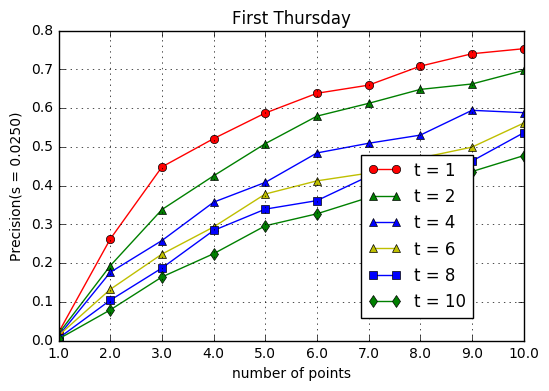

In [6]:
# 对时间尺度进行放缩，观察多少个时空点能够唯一确定一个用户
import numpy as np
from time import time

Precise = {}
#space granularity = 1
space = 50

#time granuarity change 
for t_gra in [1,2,4,6,8,10]:        # 时间粒度
    s_gra = round(1000/space)       # 空间粒度    
    Precise[t_gra] = []
    timenum_dic = {}
    ind2point_dic = {} # 将时空点用数字索引
    point2ind_dic = {} # 将数字用时空点检索
    user_dic = {} # 每个用户对应的时空点的数量
    fr = open('/home/data/cleandayone','r')
    count = 0
    done = 0 #判断是否在while循环中被赋值过
    for line in fr.readlines():
        p = 1
        done = 0
        item = line.strip().split(',')
        if len(item) != 4 or '' in item:
            continue
        while (p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)) in timenum_dic:
            if int(item[0]) in timenum_dic[p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)]:
                p += 1            
                continue
            timenum_dic[p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)].append(int(item[0]))
            done = 1
            break        
        if done == 1:
            continue
        timenum_dic[p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)] = [int(item[0])]
        ind2point_dic[count] = (p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra))
        point2ind_dic[(p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra))] = count
        count += 1
        if int(item[0]) not in user_dic:
            user_dic[int(item[0])] = []
        reco = point2ind_dic[(p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra))]
        user_dic[int(item[0])].append(reco)
        t = set(user_dic[int(item[0])])
        user_dic[int(item[0])] = [ i for i in t]
    for user in timenum_dic:
        temp = set(timenum_dic[user])
        timenum_dic[user] = [i for i in temp]
    fr.close()

    # P为时空点的个数
    P = 1 
    while P <= 10:
        tsPointNum = P     #时空点的个数    
        cycle = 1000
        count = 0
        for rd in range(0, cycle):
            num = 0    
            while num < tsPointNum:
                userNum = np.random.randint(len(user_dic))  #找出序号为userNum的用户
                if userNum not in user_dic:
                    continue
                num = len(user_dic[userNum])
            index = np.random.permutation(np.arange(num))[:tsPointNum]
            userPoint = user_dic[userNum] # 找出序号userNum 对应人去过的所有时空点,放在列表usePoint[]中                 
            happenCount={}
            for g in range(0, tsPointNum):
                temp_seq = index[g]    
                temp_point = userPoint[temp_seq]
                temp_p2char = ind2point_dic[temp_point]
                # temp_p2char = [p , timestamp, lat, lon]
                # 把p变成从小开始的增序                  
                if (temp_p2char[1],temp_p2char[2],temp_p2char[3]) in happenCount:                  
                    happenCount[(temp_p2char[1],temp_p2char[2],temp_p2char[3])] += 1
                else:
                    happenCount[(temp_p2char[1],temp_p2char[2],temp_p2char[3])] = 1
                temp_p2char = (happenCount[(temp_p2char[1],temp_p2char[2],temp_p2char[3])],temp_p2char[1],temp_p2char[2],temp_p2char[3])
                temp_Set = timenum_dic[temp_p2char]
                if g == 0:
                    pointSet = temp_Set
                pointSet = set(pointSet) & set(temp_Set)
                pointSet = [t for t in pointSet]
            if len(pointSet) == 1:
                count = count + 1
        Precise[t_gra].append(float(count)/cycle)
        P = P + 1
    print(Precise[t_gra])
    

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
  
xmajorLocator   = MultipleLocator(1) #将x主刻度标签设置为20的倍数  
xmajorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式  
xminorLocator   = MultipleLocator(0.2) #将x轴次刻度标签设置为5的倍数  
  
ymajorLocator   = MultipleLocator(0.1) #将y轴主刻度标签设置为0.5的倍数  
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式  
yminorLocator   = MultipleLocator(0.05) #将此y轴次刻度标签设置为0.1的倍数  


plt.title('First Thursday')
plt.ylabel('Precision(s = 0.0250)')
plt.xlabel('number of points')
x = [1,2,3,4,5,6,7,8,9,10]

p1 = Precise[1]
p2 = Precise[2]
p3 = Precise[4]
p4 = Precise[6]
p5 = Precise[8]
p6 = Precise[10]

q1 = plt.plot(x,p1,'ro-',label='t = 1')
q2 = plt.plot(x,p2,'g^-',label='t = 2')
q3 = plt.plot(x,p3,'b^-',label='t = 4')
q4 = plt.plot(x,p4,'y^-',label='t = 6')
q5 = plt.plot(x,p5,'s-', label='t = 8')
q6 = plt.plot(x,p6,'d-', label='t = 10')

ax =plt.subplot(111)
ax.xaxis.set_major_locator(xmajorLocator)  
ax.xaxis.set_major_formatter(xmajorFormatter)  
  
ax.yaxis.set_major_locator(ymajorLocator)  
ax.yaxis.set_major_formatter(ymajorFormatter)  
ax.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度  
ax.yaxis.grid(True, which='major') #y坐标轴的网格使用次刻度  
#q1 = plt.plot(p1,'ro-',p2,'g^-',p3,'y^-',p4,'b*-',p5,'s-',p6,'d-')
#plt.legend(('t = 1','t = 2', 't = 4','t = 6','t = 8', 't = 10'))
plt.legend(bbox_to_anchor=(.65, .6), loc=2, borderaxespad=0.)
plt.show()

0.978
0.984
0.951
0.946
0.93
0.922
0.911
0.901
0.885
0.875
0.952
0.912
0.884
0.838
0.835
0.786
0.805
0.769
0.73
0.734
0.923
0.825
0.789
0.74
0.716
0.688
0.671
0.622
0.629
0.612
0.87
0.771
0.73
0.675
0.653
0.651
0.607
0.586
0.586
0.576
0.831
0.743
0.711
0.647
0.589
0.553
0.524
0.547
0.514
0.516
0.802
0.724
0.621
0.558
0.563
0.529
0.508
0.493
0.488
0.443
0.74
0.645
0.6
0.552
0.521
0.486
0.479
0.462
0.43
0.428
0.734
0.653
0.563
0.569
0.493
0.473
0.48
0.42
0.397
0.395
0.7
0.575
0.539
0.485
0.485
0.441
0.416
0.404
0.386
0.4
0.664
0.609
0.519
0.472
0.431
0.434
0.389
0.386
0.359
0.352


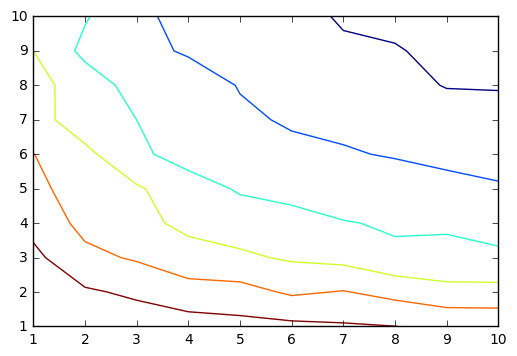

In [13]:
# 综合观察space和time的影响
import numpy as np
from time import time

Precise = np.zeros((11,11))
#space granularity = 1
space = 1

#time granuarity change 
for space in range(1,11):
    for t_gra in range(1,11):        # 时间粒度
        s_gra = round(1000/space/2)       # 空间粒度    
        timenum_dic = {}
        ind2point_dic = {} # 将时空点用数字索引
        point2ind_dic = {} # 将数字用时空点检索
        user_dic = {} # 每个用户对应的时空点的数量
        fr = open('/home/data/cleandaysix','r')
        count = 0
        done = 0 #判断是否在while循环中被赋值过
        for line in fr.readlines():
            p = 1
            done = 0
            item = line.strip().split(',')
            if len(item) != 4 or '' in item:
                continue
            while (p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)) in timenum_dic:
                if int(item[0]) in timenum_dic[p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)]:
                    p += 1            
                    continue
                timenum_dic[p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)].append(int(item[0]))
                done = 1
                break        
            if done == 1:
                continue
            timenum_dic[p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra)] = [int(item[0])]
            ind2point_dic[count] = (p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra))
            point2ind_dic[(p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra))] = count
            count += 1
            if int(item[0]) not in user_dic:
                user_dic[int(item[0])] = []
            reco = point2ind_dic[(p,int(item[1])/t_gra, float(round(float(item[2])*s_gra)/s_gra), float(round(float(item[3])*s_gra)/s_gra))]
            user_dic[int(item[0])].append(reco)
            t = set(user_dic[int(item[0])])
            user_dic[int(item[0])] = [ i for i in t]
        for user in timenum_dic:
            temp = set(timenum_dic[user])
            timenum_dic[user] = [i for i in temp]
        fr.close()

    # P为时空点的个数
        P = 3
        tsPointNum = P     #时空点的个数    
        cycle = 1000
        count = 0
        for rd in range(0, cycle):
            num = 0    
            while num < tsPointNum:
                userNum = np.random.randint(len(user_dic))  #找出序号为userNum的用户
                if userNum not in user_dic:
                    continue
                num = len(user_dic[userNum])
            index = np.random.permutation(np.arange(num))[:tsPointNum]
            userPoint = user_dic[userNum] # 找出序号userNum 对应人去过的所有时空点,放在列表usePoint[]中                 
            happenCount={}
            for g in range(0, tsPointNum):
                temp_seq = index[g]    
                temp_point = userPoint[temp_seq]
                temp_p2char = ind2point_dic[temp_point]
                # temp_p2char = [p , timestamp, lat, lon]
                # 把p变成从小开始的增序                  
                if (temp_p2char[1],temp_p2char[2],temp_p2char[3]) in happenCount:                  
                    happenCount[(temp_p2char[1],temp_p2char[2],temp_p2char[3])] += 1
                else:
                    happenCount[(temp_p2char[1],temp_p2char[2],temp_p2char[3])] = 1
                temp_p2char = (happenCount[(temp_p2char[1],temp_p2char[2],temp_p2char[3])],temp_p2char[1],temp_p2char[2],temp_p2char[3])
                temp_Set = timenum_dic[temp_p2char]
                if g == 0:
                    pointSet = temp_Set
                pointSet = set(pointSet) & set(temp_Set)
                pointSet = [t for t in pointSet]
            if len(pointSet) == 1:
                count = count + 1
        Precise[space,t_gra] = (float(count)/cycle)
        print(Precise[space,t_gra])
        
# 综合观察space和time的影响
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(1,11)
Y = np.arange(1,11,1)
plt.contour(X,Y,Precise[1:11,1:11])
plt.show()

121


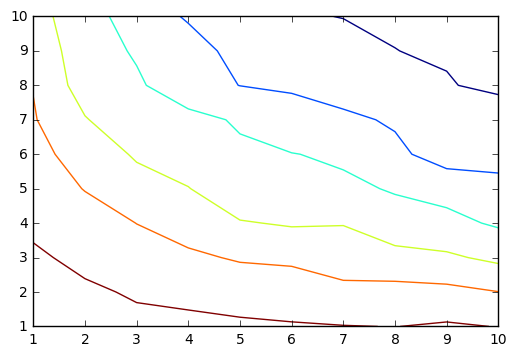

In [46]:
X = np.arange(1,11)
Y = np.arange(1,11,1)
print(np.size(Precise))
plt.contour(X,Y,Precise[1:11,1:11])
plt.show()

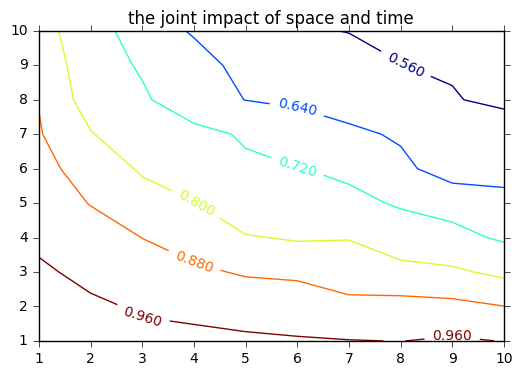

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [5]:
x1 = [ 0.983, 0.985, 0.978, 0.971, 0.971, 0.966, 0.962, 0.959, 0.969, 0.958 ]
x2 = [ 0.985, 0.972, 0.952, 0.948, 0.93,  0.921, 0.901, 0.903, 0.9,   0.881 ]
x3 = [ 0.972, 0.941, 0.921, 0.894, 0.872, 0.866, 0.839, 0.829, 0.812, 0.783 ]
x4 = [ 0.944, 0.926, 0.879, 0.844, 0.806, 0.792, 0.797, 0.745, 0.741, 0.71  ]
x5 = [ 0.94,  0.876, 0.823, 0.803, 0.738, 0.745, 0.732, 0.715, 0.694, 0.674 ]
x6 = [ 0.912, 0.836, 0.793, 0.753, 0.733, 0.722, 0.71,  0.659, 0.601, 0.599 ]
x7 = [ 0.886, 0.805, 0.744, 0.744, 0.711, 0.673, 0.657, 0.63,  0.577, 0.625 ]
x8 = [ 0.877, 0.762, 0.732, 0.668, 0.639, 0.63,  0.602, 0.589, 0.567, 0.536 ]
x9 = [ 0.848, 0.76,  0.711, 0.672, 0.615, 0.591, 0.604, 0.561, 0.55,  0.521 ]
x10 =[ 0.829, 0.753, 0.683, 0.632, 0.59,  0.573, 0.557, 0.55,  0.518, 0.509 ]
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10])
X = np.arange(1, 11)
Y = np.arange(1, 11)

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
plt.figure()
CS = plt.contour(X, Y, data)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('the joint impact of space and time')
# This makes the original colorbar look a bit out of place,
# so let's improve its position.
#CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()
a = np.zeros((10,10))
print(a)

0.966
[ 0.167  0.743  0.898  0.939  0.957  0.963]
[[ 0.673  0.947  0.966  0.986  0.984  0.975]
 [ 0.167  0.743  0.898  0.939  0.957  0.963]
 [ 0.067  0.609  0.786  0.86   0.891  0.923]
 [ 0.035  0.529  0.71   0.791  0.854  0.866]
 [ 0.018  0.455  0.689  0.76   0.832  0.819]
 [ 0.005  0.214  0.45   0.57   0.657  0.735]]
(36, 6)


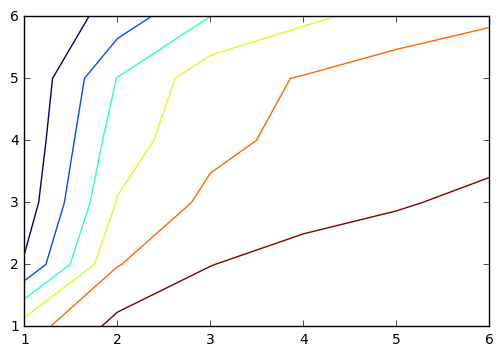

In [24]:
# 综合观察space和time的影响
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

delta = 1
x = np.arange(1,7)
y = np.arange(1,7)
t1 = np.array([0.673, 0.947, 0.966, 0.986, 0.984, 0.975])
t2 = np.array([0.167, 0.743, 0.898, 0.939, 0.957, 0.963])
t3 = np.array([0.067, 0.609, 0.786, 0.86, 0.891, 0.923])
t4 = np.array([0.035, 0.529, 0.71, 0.791, 0.854, 0.866])
t5 = np.array([0.018, 0.455, 0.689, 0.76, 0.832, 0.819])
t6 = np.array([0.005, 0.214, 0.45, 0.57, 0.657, 0.735])
print(t2)
X, Y = np.meshgrid(x, y)
Z = np.matrix([t1,t2,t3,t4,t5,t6])
print(Z)
print(np.size(X),np.size(x))
plt.contour(X,Y,Z)
plt.show()

1
3
